# Netflix Title

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import warnings
warnings.filterwarnings("ignore")

## 데이터 불러오기

In [3]:
data = pd.read_csv("netflix_titles.csv")

In [32]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


## column 정보

**show_id** - Unique ID for every Movie / Tv Show  
**type** - Identifier - A Movie or TV Show   
**title** - Title of the Movie / Tv Show   
**director** - Director of the Movie   
**cast** - Actors involved in the movie / show   
**country** - Country where the movie / show was produced   
**date_added** - Date it was added on Netflix   
**release_year** - Actual Release year of the move / show   
**rating** - TV Rating of the movie / show   
**duration** - Total Duration - in minutes or number of seasons   
**listed_in** - Genere   
**description** - The summary description  

In [34]:
data.shape

(7787, 12)

In [35]:
data.nunique()

show_id         7787
type               2
title           7787
director        4049
cast            6831
country          681
date_added      1565
release_year      73
rating            14
duration         216
listed_in        492
description     7769
dtype: int64

고유 id는 각각 하나씩 있고, 2개의 타입으로 나뉘어 있고, 제목도 전부 다르다.

## null값 확인

In [36]:
data.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

director, cast, country에서 몇몇 null값이 확인됨

<AxesSubplot:>

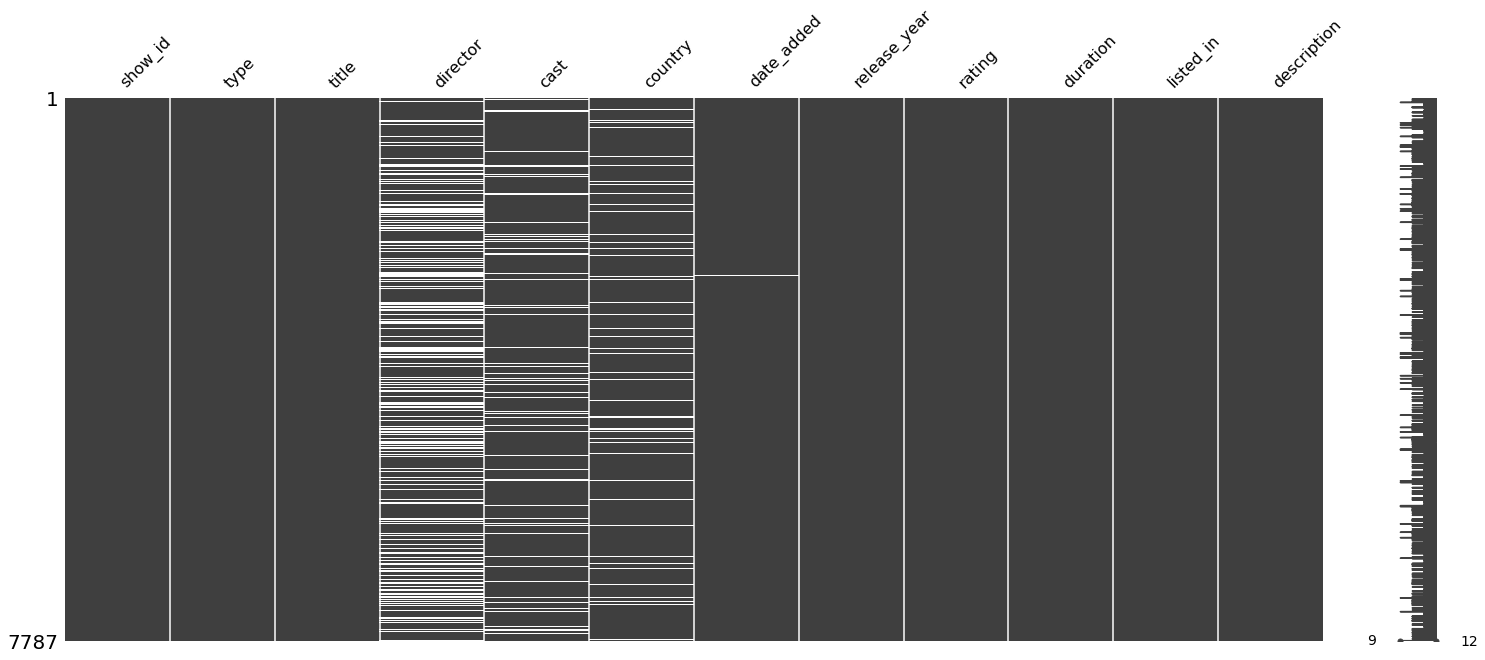

In [37]:
msno.matrix(data)

director와 cast, country가 확실히 많이 비어있는 것을 볼 수 있다.

## Type 비율

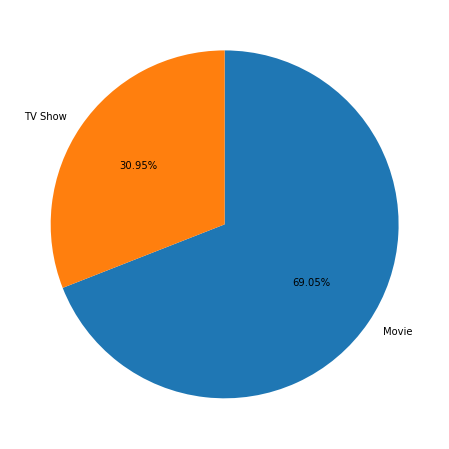

In [38]:
plt.figure(figsize=(8,8))
plt.pie(data['type'].value_counts(), ## 파이차트 출력
       startangle=90, ## 시작점을 90도(degree)로 지정
       counterclock=False, ## 시계 방향으로 그린다.
       autopct=lambda p : '{:.2f}%'.format(p), ## 퍼센티지 출력
       labels = data['type'].value_counts().index
       )
 
plt.show()

TV show는 전체(7787개)의 데이터 중 30.95%, Movie는 69.05%임을 확인할 수 있었다.

In [39]:
data.director.value_counts

<bound method IndexOpsMixin.value_counts of 0                     NaN
1       Jorge Michel Grau
2            Gilbert Chan
3             Shane Acker
4          Robert Luketic
              ...        
7782          Josef Fares
7783          Mozez Singh
7784                  NaN
7785                  NaN
7786             Sam Dunn
Name: director, Length: 7787, dtype: object>

## country별 작품 수

In [40]:
data['country'].value_counts()

United States                             2555
India                                      923
United Kingdom                             397
Japan                                      226
South Korea                                183
                                          ... 
Russia, United States                        1
Indonesia, United Kingdom                    1
United Kingdom, Germany, United States       1
Argentina, United States, Mexico             1
Spain, Portugal                              1
Name: country, Length: 681, dtype: int64

In [41]:
major_countries = (data['country'].value_counts())[:20]

major_countries

United States                    2555
India                             923
United Kingdom                    397
Japan                             226
South Korea                       183
Canada                            177
Spain                             134
France                            115
Egypt                             101
Turkey                            100
Mexico                            100
Australia                          83
Taiwan                             78
Brazil                             72
Philippines                        71
Nigeria                            70
Indonesia                          70
United Kingdom, United States      64
Germany                            61
United States, Canada              60
Name: country, dtype: int64

<AxesSubplot:>

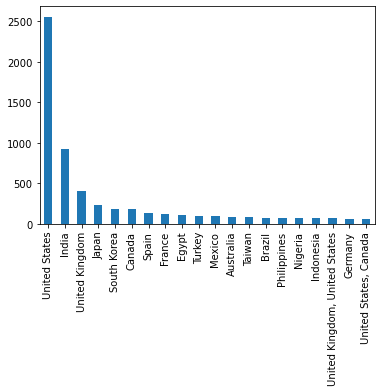

In [42]:
major_countries.plot(kind="bar")
# plt.xticks(rotation=45) 

미국에서 압도적으로 많은 영화 및 쇼가 제작되었다.   
인디아가 생각보다 높은 비율을 차지하고 있다.

## date_added

datetime 변경

In [43]:
data['date_added']

0          August 14, 2020
1        December 23, 2016
2        December 20, 2018
3        November 16, 2017
4          January 1, 2020
               ...        
7782      October 19, 2020
7783         March 2, 2019
7784    September 25, 2020
7785      October 31, 2020
7786         March 1, 2020
Name: date_added, Length: 7787, dtype: object

In [44]:
data['date_added'] = pd.to_datetime(data['date_added'], errors='coerce')
data['date_added']

0      2020-08-14
1      2016-12-23
2      2018-12-20
3      2017-11-16
4      2020-01-01
          ...    
7782   2020-10-19
7783   2019-03-02
7784   2020-09-25
7785   2020-10-31
7786   2020-03-01
Name: date_added, Length: 7787, dtype: datetime64[ns]

In [49]:
data['date_added_year'] = data['date_added'].dt.year
data['date_added_month'] = data['date_added'].dt.month_name()

In [50]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,date_added_month,date_added_year
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,August,2020.0
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,December,2016.0
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",December,2018.0
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",November,2017.0
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,January,2020.0


### 년도 별 추가된 작품 수

<AxesSubplot:xlabel='date_added_year', ylabel='count'>

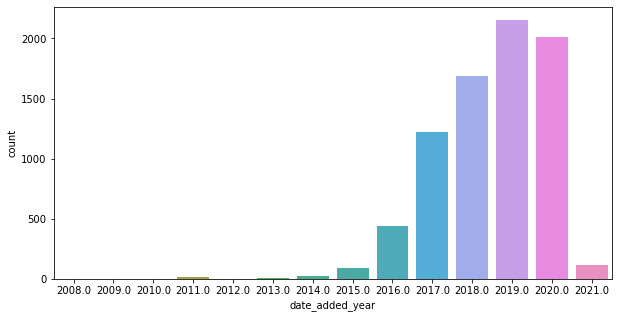

In [77]:
plt.figure(figsize=(10,5))
sns.countplot('date_added_year', data=data)

넷플릭스가 흥행할때 쯤? 많은 작품이 추가된 것 같다.

## 달 별 추가된 작품 수

<AxesSubplot:xlabel='date_added_month', ylabel='count'>

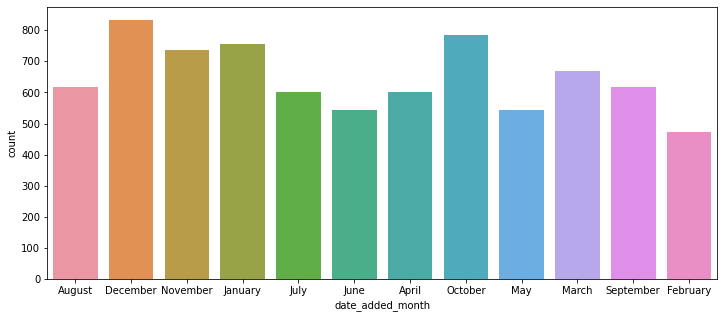

In [76]:
plt.figure(figsize=(12,5))
sns.countplot('date_added_month', data=data)

연말, 연초에 많은 작품들이 추가되었다.

<AxesSubplot:xlabel='date_added_month', ylabel='date_added_year'>

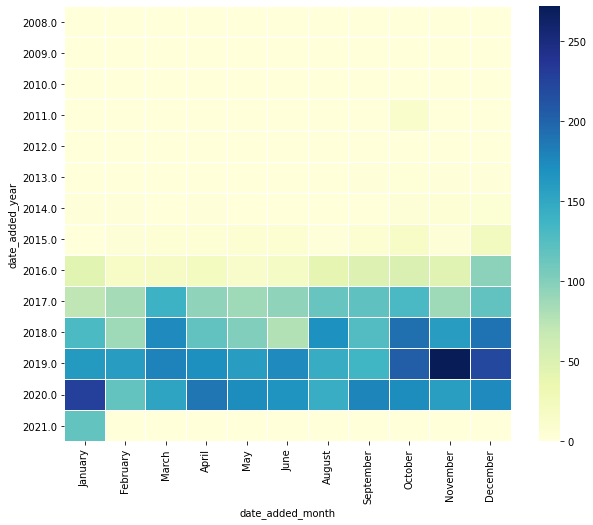

In [120]:
releases = data[['date_added_month','date_added_year']].dropna()
month_name = ['January', 'February', 'March', 'April', 'May', 'June', 'August', 'September', 'October', 'November', 'December']

plt.figure(figsize=(10,8))
Hmap = releases.groupby('date_added_year')['date_added_month'].value_counts().unstack().fillna(0)[column_order] #matrix로 변경


sns.heatmap(Hmap, linewidths=.7,cmap="YlGnBu")

2019년 11월에 가장 많은 작품이 넷플릭스에 등록되었다.

## release year

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72]),
 [Text(0, 0, '1925'),
  Text(1, 0, '1942'),
  Text(2, 0, '1943'),
  Text(3, 0, '1944'),
  Text(4, 0, '1945'),
  Text(5, 0, '1946'),
  Text(6, 0, '1947'),
  Text(7, 0, '1954'),
  Text(8, 0, '1955'),
  Text(9, 0, '1956'),
  Text(10, 0, '1958'),
  Text(11, 0, '1959'),
  Text(12, 0, '1960'),
  Text(13, 0, '1962'),
  Text(14, 0, '1963'),
  Text(15, 0, '1964'),
  Text(16, 0, '1965'),
  Text(17, 0, '1966'),
  Text(18, 0, '1967'),
  Text(19, 0, '1968'),
  Text(20, 0, '1969'),
  Text(21, 0, '1970'),
  Text(22, 0, '1971'),
  Text(23, 0, '1972'),
  Text(24, 0, '1973'),
  Text(25, 0, '1974'),
  Text(26, 0, '1975'),
  Text(27, 0, '1976'),
  Text(28, 0, '1977'),
  Text(29

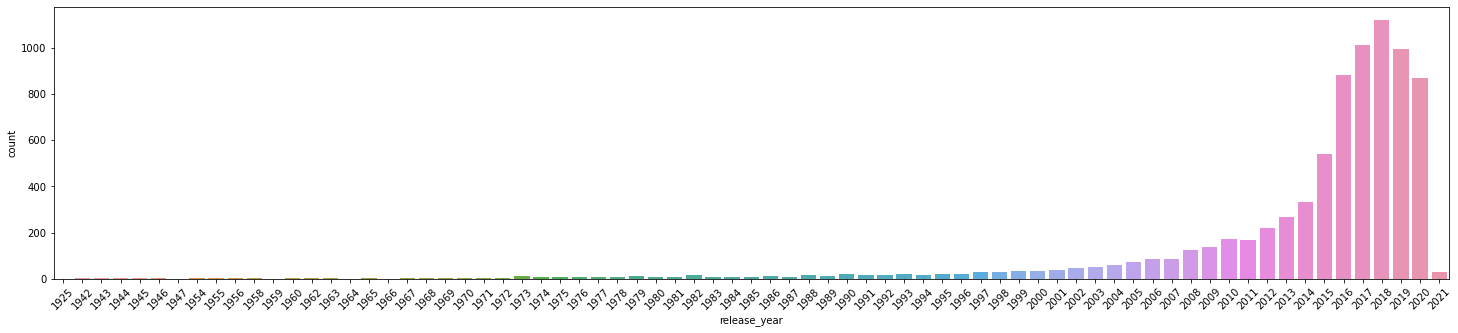

In [75]:
plt.figure(figsize=(25,5))
sns.countplot('release_year', data=data)
plt.xticks(rotation=45)

비교적 최근 발매된 영화 및 TV쇼가 많다.

## rating

In [4]:
data['rating'].value_counts()

TV-MA       2863
TV-14       1931
TV-PG        806
R            665
PG-13        386
TV-Y         280
TV-Y7        271
PG           247
TV-G         194
NR            84
G             39
TV-Y7-FV       6
UR             5
NC-17          3
Name: rating, dtype: int64

**TV**
- TV-MA : 18세 이상
- TV-14 : 16세 이상
- TV-PG : 7세 이상
- TV-Y : 전체
- TV-Y7 : 7세 이상
- TV-G : 전체
- TV-Y7-FV : 7세이상

**영화**
- R : 청불(18세 이상)
- PG-13 : 13세 이상
- PG : 7세 이상
- G: 전체
- NC-17 : 청불

<AxesSubplot:xlabel='rating', ylabel='count'>

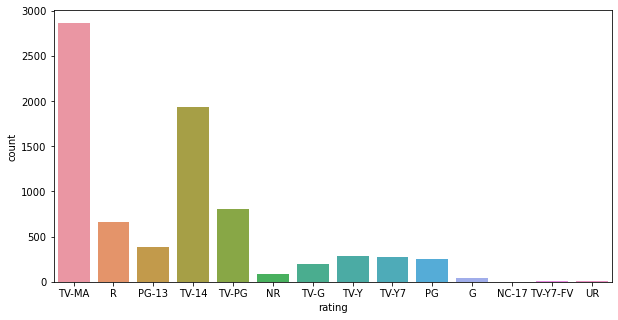

In [6]:
plt.figure(figsize=(10,5))
sns.countplot('rating', data=data)

## listed_in

장르.   

영화와 TV Show를 나눠서 판단

In [10]:
movies = data[data['type'] == 'Movie']
tv_shows = data[data['type'] == 'TV Show']

### Movie Genre

<AxesSubplot:xlabel='count', ylabel='genre'>

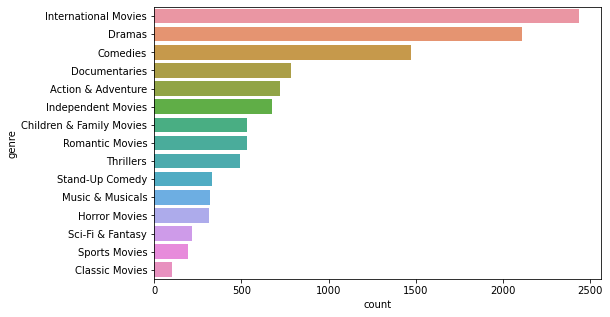

In [32]:
from collections import Counter

genres = ", ".join(movies['listed_in']).split(", ")
top_genres = Counter(genres).most_common(15)

genre = [_[0] for _ in top_genres]
count = [_[1] for _ in top_genres]

df_genres = pd.DataFrame({ 'genre': genre, 'count': count })

plt.figure(figsize=(8,5))
sns.barplot('count','genre',data=df_genres)

영화 장르 상위 15개

<AxesSubplot:xlabel='count', ylabel='genre'>

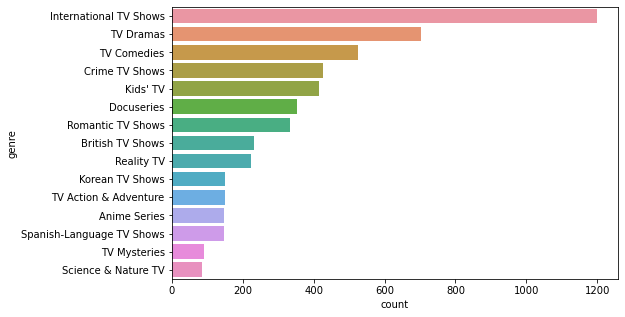

In [34]:
tv_genres = ", ".join(tv_shows['listed_in']).split(", ")
tv_top_genres = Counter(tv_genres).most_common(15)

tv_genre = [_[0] for _ in tv_top_genres]
tv_count = [_[1] for _ in tv_top_genres]

df_tvgenres = pd.DataFrame({ 'genre': tv_genre, 'count': tv_count })

plt.figure(figsize=(8,5))
sns.barplot('count','genre',data=df_tvgenres)

## duration

잘 모르겠다.